## nheatmap

## Load library

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sklearn.decomposition, sklearn.cluster
from nheatmap import nhm, scripts
import matplotlib.pyplot as plt
import matplotlib as mpl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate Data

In [5]:
df = scripts.simulate_data(nrows=120)
nrows, ncols = np.shape(df)
pc = sklearn.decomposition.PCA().fit(df)
dfr = pd.DataFrame(pc.transform(df)[:, 0], index=['sample '+str(x) for x in np.arange(1, nrows+1)],
        columns=['PC1'])
dfr['cell cluster'] = sklearn.cluster.KMeans(n_clusters=20).fit_predict(df).astype(str)
dfc = pd.DataFrame(pc.components_[0], index=['gene '+str(x) for x in
    np.arange(1, ncols+1)], columns=['PC score'])
dfc['gene cluster'] = sklearn.cluster.KMeans(n_clusters=10).fit_predict(df.T).astype(str)
dfc['PC score 2'] = pc.components_[1]
## Here we make a smaller subset of the larger data
dfsmall = df.iloc[:20, :10]
dfrsmall = dfr.iloc[:20]
dfcsmall = dfc.iloc[:10]

### Inspect the structure of the data

In [6]:
df.head()

,gene 1,gene 2,gene 3,gene 4,gene 5,gene 6,gene 7,gene 8,gene 9,gene 10,...,gene 51,gene 52,gene 53,gene 54,gene 55,gene 56,gene 57,gene 58,gene 59,gene 60
sample 1,7.678955,7.690607,6.719481,6.689881,7.683741,6.745118,6.767813,0.903977,8.263623,6.755189,...,3.006846,3.422100,3.216907,3.163146,2.681215,2.702289,7.701435,2.927628,3.308798,3.031992
sample 2,6.673886,3.004332,6.696234,7.681609,6.674983,6.776875,6.749088,0.904011,3.244646,0.464191,...,1.039083,2.104765,3.059090,2.710804,2.503705,1.114537,2.524825,1.680606,6.788251,2.982648
sample 3,7.695463,6.778046,2.881933,2.942569,3.035483,2.554880,6.698132,2.049438,6.763429,3.273685,...,2.966097,2.776296,1.747829,3.300818,2.686097,0.463020,2.531318,2.633057,6.710196,7.670138
sample 4,8.258263,2.710411,2.954759,2.894445,3.237700,6.694744,0.518524,3.063694,2.713869,3.299208,...,3.362068,2.607956,0.636101,0.601830,7.707201,2.295424,2.927924,1.517101,3.256010,0.189307
sample 5,7.656148,6.758560,6.783686,2.301056,6.702702,7.680651,6.724234,8.664719,1.836387,8.270550,...,0.947699,2.993917,3.433811,2.865605,2.793522,2.830262,1.357827,2.211428,6.711786,7.710498


In [7]:
dfr.head()

,PC1,cell cluster
sample 1,-10.390875,11
sample 2,-6.781116,8
sample 3,-6.947232,7
sample 4,-5.067072,4
sample 5,-6.973185,4


In [8]:
dfc.head()

,PC score,gene cluster,PC score 2
gene 1,-0.150670,0,-0.124757
gene 2,-0.132388,0,-0.123026
gene 3,-0.142045,0,-0.131621
gene 4,-0.142161,0,-0.124834
gene 5,-0.161618,0,-0.138368


### Define the colormaps for each column key (optional)

In [9]:
cmaps={'cell cluster':'Paired', 'PC1':'RdYlGn', 'gene cluster':'inferno',
        'PC score':'gist_heat', 'PC score 2':'rainbow'}

## Make some plots

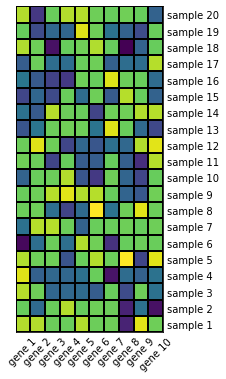

In [10]:
g = nhm(data=dfsmall)
fig, plots = g.run()

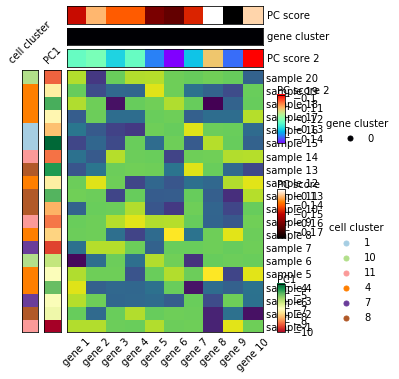

In [11]:
g = nhm(data=dfsmall, dfr=dfrsmall, dfc=dfcsmall, figsize=(6, 6), linewidths=0, cmaps=cmaps)
fig, plots = g.run()

### Having the ytick show is a little annoying, so let's hide it.

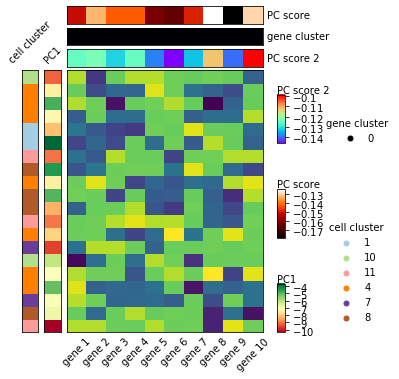

In [12]:
g = nhm(data=dfsmall, dfr=dfrsmall, dfc=dfcsmall, figsize=(6, 6), linewidths=0, cmaps=cmaps, showyticks=False)
fig, plots = g.run()

### Let's plot the larger dataframe and show all the colorbar and legends.

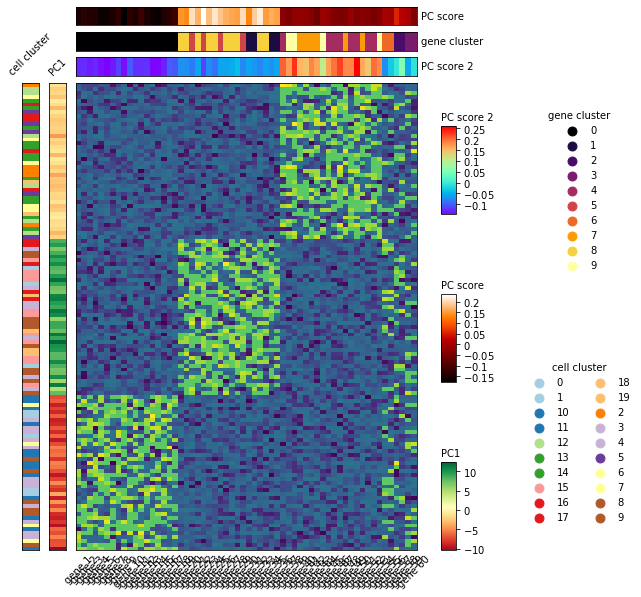

In [13]:
g = nhm(data=df, dfr=dfr, dfc=dfc, figsize=(10, 10), linewidths=0, cmaps=cmaps)
fig, plots = g.run()

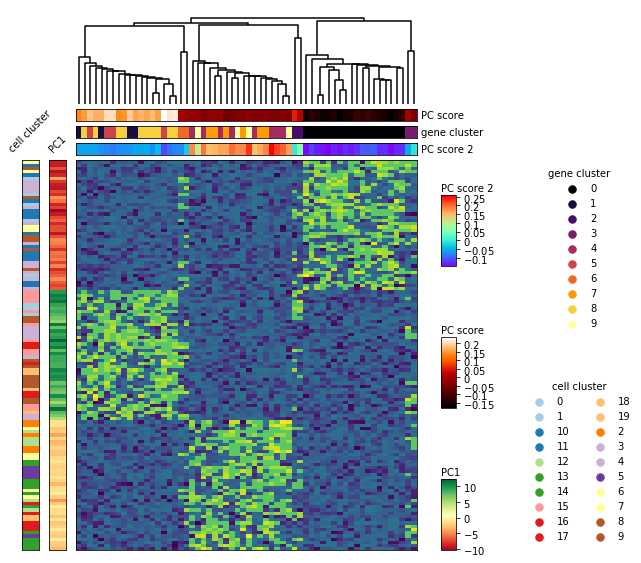

In [14]:
g = nhm(data=df, dfr=dfr, dfc=dfc, figsize=(10, 10), linewidths=0, cmaps=cmaps, showxticks=False)
g.hcluster(showRdendrogram=False)
fig, plots = g.run()

### Add additional meta-column in real-time

In [15]:
dfc['New metadata'] = np.random.rand(dfc.shape[0])

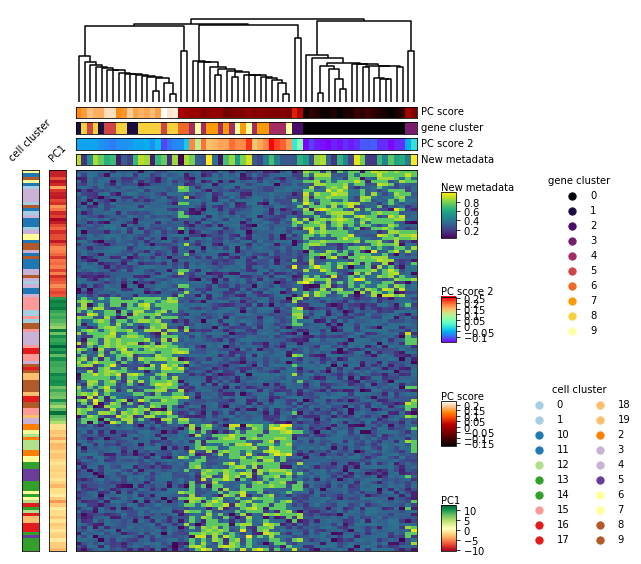

In [16]:
g = nhm(data=df, dfr=dfr, dfc=dfc, figsize=(10, 10), linewidths=0, cmaps=cmaps, showxticks=False)
g.hcluster(showRdendrogram=False)
fig, plots = g.run()